# Solving for the concentration of ligand-homodimer complexes

In [31]:
import sympy

In [32]:
from sympy import Interval, S

In [33]:
from sympy.plotting import plot

Consider a system with ligands in solution with amount concentration $c_\textrm{L}$ and protein monomers embedded in a lipid bilayer with surface amount concentration $\Gamma_\textrm{M}$.
In this system, the ligands can bind up to two monomers simultaneously. We consider both the equilbrium of a monomer binding to a free ligand,

\begin{equation}
    \textrm{M + L ⇌ ML},
\end{equation}

where the dissociation constant is defined as

\begin{equation}
    K_\textrm{D, s} = \frac{\Gamma_\textrm{M} c_\textrm{L}}{\Gamma_\textrm{ML}},
\end{equation}

where $\Gamma_\textrm{ML}$ is the surface amount concentration of monomers bound to a single ligand, and the equilibrium of a monomer binding to an already bound ligand,

\begin{equation}
\textrm{ML + M ⇌ MLM},
\end{equation}

where the dissociation constant is defined as

\begin{equation}
    K_\textrm{D, d} = \frac{\Gamma_\textrm{ML} \Gamma_\textrm{M}}{\Gamma_\textrm{MLM}},
\end{equation}

where $\Gamma_\textrm{MLM}$ is the concentration of the ligand-homodimer complex.

We want an expression for $\Gamma_\textrm{MLM}$ that does not include $\Gamma_\textrm{M}$ or $\Gamma_\textrm{ML}$.
We can use the equation for the mass balance of the protein monomer,

\begin{equation}
    \Gamma_\textrm{M, tot} = \Gamma_\textrm{M} + \Gamma_\textrm{ML} + 2 \Gamma_\textrm{MLM},
\end{equation}

to obtain such an expression.

In [4]:
gamma_M, gamma_Mtot, c_L, gamma_ML, gamma_MLM, K_Dd, K_Ds = sympy.symbols(r"\Gamma_\textrm{M} \Gamma_\textrm{M\,\ tot} c_L \Gamma_\textrm{ML} \Gamma_\textrm{MLM} K_\textrm{D\,\ d} K_\textrm{D\,\ s}", real=True, positive=True)

In [5]:
M_balance = gamma_Mtot - gamma_M - gamma_ML - 2*gamma_MLM

In [6]:
M_balance

\Gamma_\textrm{M, tot} - 2*\Gamma_\textrm{MLM} - \Gamma_\textrm{ML} - \Gamma_\textrm{M}

In [7]:
M_ML_equil = (gamma_M * c_L)/gamma_ML - K_Ds

In [8]:
M_ML_equil

-K_\textrm{D, s} + \Gamma_\textrm{M}*c_L/\Gamma_\textrm{ML}

In [9]:
ML_MLM_equil = (gamma_M * gamma_ML)/gamma_MLM - K_Dd

In [10]:
ML_MLM_equil

-K_\textrm{D, d} + \Gamma_\textrm{ML}*\Gamma_\textrm{M}/\Gamma_\textrm{MLM}

In [11]:
gamma_M_sol = sympy.solveset(M_balance, gamma_M, domain=S.Reals)

In [12]:
gamma_M_sol

{\Gamma_\textrm{M, tot} - 2*\Gamma_\textrm{MLM} - \Gamma_\textrm{ML}}

In [13]:
gamma_M_sol = gamma_M_sol.args[0]

In [14]:
gamma_ML_sol = sympy.solveset(M_ML_equil.subs(gamma_M, gamma_M_sol), gamma_ML, domain=sympy.S.Reals)

In [15]:
gamma_ML_sol

Complement({c_L*(\Gamma_\textrm{M, tot} - 2*\Gamma_\textrm{MLM})/(K_\textrm{D, s} + c_L)}, {0})

In [16]:
gamma_ML_sol = gamma_ML_sol.args[0].args[0]

In [17]:
gamma_ML_sol

c_L*(\Gamma_\textrm{M, tot} - 2*\Gamma_\textrm{MLM})/(K_\textrm{D, s} + c_L)

In [76]:
gamma_MLM_sol = sympy.solveset(ML_MLM_equil.subs([(gamma_M, gamma_M_sol), (gamma_ML, gamma_ML_sol)]), gamma_MLM, domain=S.Reals)

In [77]:
gamma_MLM_sol.args[0].args[1]

sqrt(K_\textrm{D, d})*(K_\textrm{D, s} + c_L)*sqrt(K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 8*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L)/(8*K_\textrm{D, s}*c_L) + (K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 4*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L)/(8*K_\textrm{D, s}*c_L)

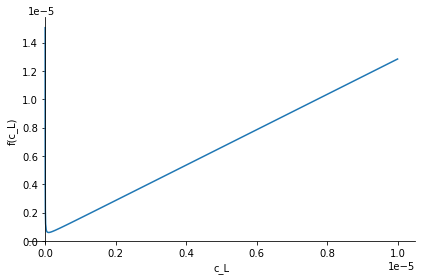

In [84]:
plot(gamma_MLM_sol.args[0].args[1].subs([(K_Dd, 5e-7), (K_Ds, 1e-7), (gamma_Mtot, 1e-7)]), (c_L, 0, 1e-5))

The second solution seems to just diverge to infinity nearly $c_\textrm{L}$, is 0.1 just after, and then increases linearly afterward. I'm not exactly sure how to rigourously dismiss this solution, but the behaviour is non-physical.

In [88]:
gamma_MLM_sol = gamma_MLM_sol.args[0].args[0]

In [89]:
gamma_MLM_sol

-sqrt(K_\textrm{D, d})*(K_\textrm{D, s} + c_L)*sqrt(K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 8*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L)/(8*K_\textrm{D, s}*c_L) + (K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 4*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L)/(8*K_\textrm{D, s}*c_L)

In [90]:
sympy.simplify(gamma_MLM_sol)

(-sqrt(K_\textrm{D, d})*(K_\textrm{D, s} + c_L)*sqrt(K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 8*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L) + K_\textrm{D, d}*K_\textrm{D, s}**2 + 2*K_\textrm{D, d}*K_\textrm{D, s}*c_L + K_\textrm{D, d}*c_L**2 + 4*K_\textrm{D, s}*\Gamma_\textrm{M, tot}*c_L)/(8*K_\textrm{D, s}*c_L)

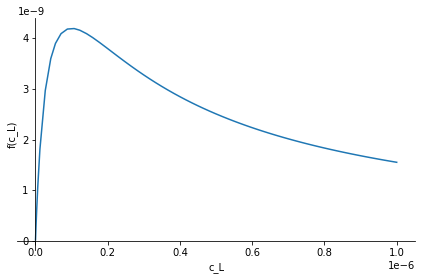

In [91]:
plot(gamma_MLM_sol.subs([(K_Dd, 5e-7), (K_Ds, 1e-7), (gamma_Mtot, 1e-7)]), (c_L, 0, 1e-6))

In [92]:
D_gamma_MLM_D_c_L = sympy.diff(gamma_MLM_sol, c_L)

In [93]:
sympy.solveset(D_gamma_MLM_D_c_L, c_L)

Complement({K_\textrm{D, s}}, {2*sqrt(2)*K_\textrm{D, s}*sqrt(\Gamma_\textrm{M, tot})*sqrt(K_\textrm{D, d} + 2*\Gamma_\textrm{M, tot})/K_\textrm{D, d} - K_\textrm{D, s}*(K_\textrm{D, d} + 4*\Gamma_\textrm{M, tot})/K_\textrm{D, d}})